In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/dataset.csv")
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [3]:
df.dtypes

Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

In [4]:
df.rename(columns={"Date": "date", 
                   " Close/Last": "close", 
                   " Volume": "volume", 
                   " Open": "open",
                    " High": "high",
                   " Low": "low"
                  }, inplace=True)

In [5]:
money_features = ["close", "open", "high", "low"]
# normalize all the money data
for feature in money_features:
    df[feature] = df[feature].apply(
        lambda x: float(x.split("$")[1])).apply(lambda y: int(y))

In [6]:
# there is not NaN values in all the dataset
np.unique(df.isna())

array([False])

In [7]:
# handling date format
df["date"] = df["date"].apply(lambda date: pd.Timestamp(date))

In [8]:
df.head()

,date,close,volume,open,high,low
0,2020-02-28,273,106721200,257,278,256
1,2020-02-27,273,80151380,281,286,272
2,2020-02-26,292,49678430,286,297,286
3,2020-02-25,288,57668360,300,302,286
4,2020-02-24,298,55548830,297,304,289


In [9]:
df["avg_price"] = df.apply(lambda x: (x.high + x.low) // 2, axis=1)

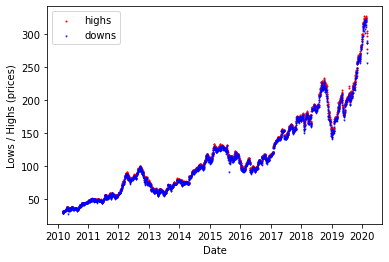

In [10]:
# plot highs and lows per day
highs = df["high"]
lows = df["low"]

fig, ax = plt.subplots()

ax.scatter(df["date"], highs, s=1, marker="o", label="highs", c="r")
ax.scatter(df["date"], lows, s=1, marker="v", label="downs", c="b")
ax.set_xlabel("Date")
ax.set_ylabel("Lows / Highs (prices)")
plt.legend();
plt.show()

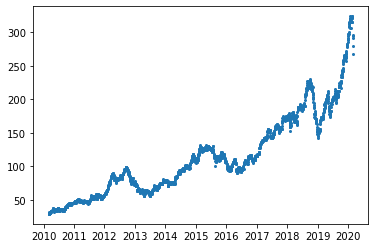

In [11]:
# plot the average price in the day
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df["date"], df["avg_price"], s=4)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [13]:
ss = StandardScaler()
df["avg_price_std"] = ss.fit_transform(df[["avg_price"]])

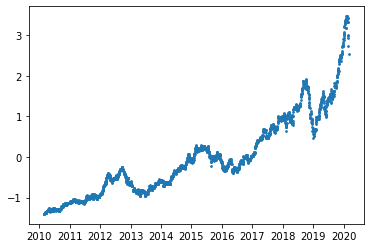

In [14]:
ax2 = plt.subplot(1,1,1)
ax2.scatter(df["date"], df["avg_price_std"], s=3)
plt.show()

In [15]:
ss_vol = StandardScaler()
df["volume_std"] = ss_vol.fit_transform(df[["volume"]])

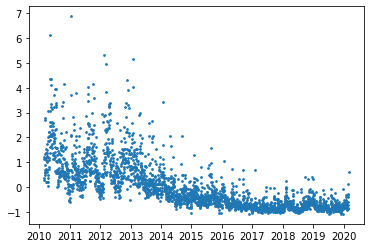

In [16]:
fig, ax = plt.subplots()
ax.scatter(df["date"], df["volume_std"], s=3)
plt.show()

In [17]:
mm = MinMaxScaler()
df["volume_mm"] = mm.fit_transform(df[["volume"]])
df.head()

,date,close,volume,open,high,low,avg_price,avg_price_std,volume_std,volume_mm
0,2020-02-28,273,106721200,257,278,256,267,2.524091,0.602988,0.211402
1,2020-02-27,273,80151380,281,286,272,279,2.722015,0.133721,0.152499
2,2020-02-26,292,49678430,286,297,286,291,2.919939,-0.404481,0.084944
3,2020-02-25,288,57668360,300,302,286,294,2.969420,-0.263366,0.102656
4,2020-02-24,298,55548830,297,304,289,296,3.002407,-0.300800,0.097958


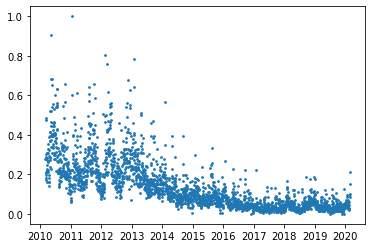

In [18]:
fig, ax = plt.subplots()
ax.scatter(df["date"], df["volume_mm"], s=3)
plt.show()

Text(0.5, 1.0, 'Volume distribution')

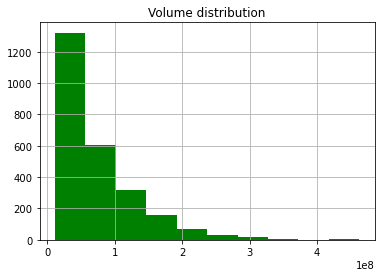

In [19]:
df.volume.hist(color="green")
plt.title("Volume distribution")

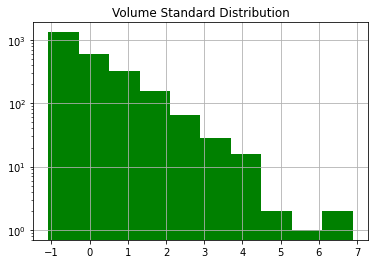

In [20]:
df.volume_std.hist(color="green")
plt.title("Volume Standard Distribution")
plt.yscale("log")

Text(0.5, 1.0, 'Volume Standard')

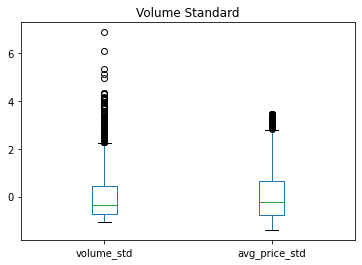

In [21]:
df[["volume_std", "avg_price_std"]].plot.box()
plt.title("Volume Standard")

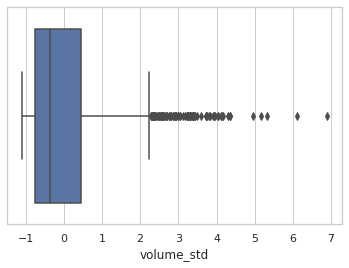

In [22]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["volume_std"])

In [23]:
df["volume_log"] = np.log((1+df["volume"]))
df.head()

,date,close,volume,open,high,low,avg_price,avg_price_std,volume_std,volume_mm,volume_log
0,2020-02-28,273,106721200,257,278,256,267,2.524091,0.602988,0.211402,18.485730
1,2020-02-27,273,80151380,281,286,272,279,2.722015,0.133721,0.152499,18.199428
2,2020-02-26,292,49678430,286,297,286,291,2.919939,-0.404481,0.084944,17.721081
3,2020-02-25,288,57668360,300,302,286,294,2.969420,-0.263366,0.102656,17.870219
4,2020-02-24,298,55548830,297,304,289,296,3.002407,-0.300800,0.097958,17.832773


<AxesSubplot:ylabel='Frequency'>

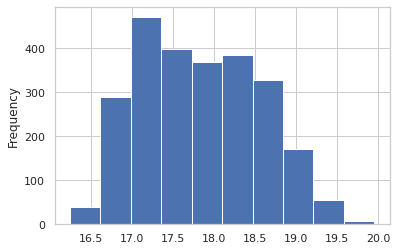

In [24]:
df["volume_log"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

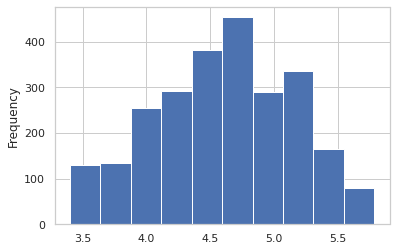

In [25]:
df["avg_price_log"] = np.log((1+df["avg_price"]))
df["avg_price_log"].plot.hist()

In [26]:
df["year"] = df["date"].apply(lambda d: d.year)
df["year"].value_counts()

2019    252
2015    252
2013    252
2011    252
2016    252
2014    252
2017    251
2018    251
2012    250
2010    214
2020     40
Name: year, dtype: int64

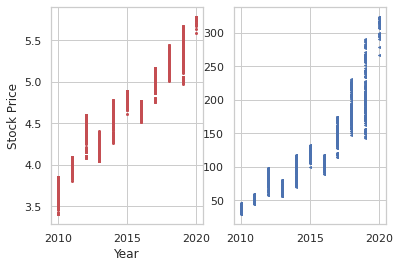

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(df["year"], df["avg_price_log"], s=4, c="r")
ax1.set_ylabel("Log Scale Price")
ax1.set_xlabel("Year")

ax2.scatter(df["year"], df["avg_price"], s=4, c="b", marker="<")
ax1.set_ylabel("Stock Price")
ax1.set_xlabel("Year")
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df.head()

,date,close,volume,open,high,low,avg_price,avg_price_std,volume_std,volume_mm,volume_log,avg_price_log,year
0,2020-02-28,273,106721200,257,278,256,267,2.524091,0.602988,0.211402,18.485730,5.590987,2020
1,2020-02-27,273,80151380,281,286,272,279,2.722015,0.133721,0.152499,18.199428,5.634790,2020
2,2020-02-26,292,49678430,286,297,286,291,2.919939,-0.404481,0.084944,17.721081,5.676754,2020
3,2020-02-25,288,57668360,300,302,286,294,2.969420,-0.263366,0.102656,17.870219,5.686975,2020
4,2020-02-24,298,55548830,297,304,289,296,3.002407,-0.300800,0.097958,17.832773,5.693732,2020


In [29]:
X = df[["volume", "close", "open", "high", "volume_std", "volume_mm", "volume_log"]]
y = df[["avg_price"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.3)

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
predictions = lr.predict(X_test)
predictions[:5]

array([[ 47.09521771],
       [189.65842401],
       [ 99.49637313],
       [108.53373279],
       [ 65.74662924]])

In [32]:
mean_squared_error(y_true=y_test, y_pred=predictions)

0.192439896932562

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [42]:
Input = [("standard_scaler", StandardScaler()), ("poly_feat", PolynomialFeatures(degree=3)), ("lr", LinearRegression())]
pipe=Pipeline(Input)

In [44]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('poly_feat', PolynomialFeatures(degree=3)),
                ('lr', LinearRegression())])

In [45]:
predict_pipe = pipe.predict(X_test)

In [62]:
mean_squared_error(y_true=y_test, y_pred=predict_pipe), pipe.score(X_test, y_test)

(0.18425293913280774, 0.9999429773246873)

In [67]:
def get_pipeline(x_train,y_train,x_test,y_test,degree):
    Input = [("standard_scaler", StandardScaler()), ("poly_feat", PolynomialFeatures(degree=degree)), ("lr", LinearRegression())]
    pipeline = Pipeline(Input)
    pipeline.fit(x_train, y_train)
    
    predictions = pipeline.predict(x_test)
    
    print(f'The R2 Score for a degree = {degree} is', pipeline.score(x_test, y_test))
    print(f'The mean squared error with a degree of {degree} is', mean_squared_error(y_true=y_test, y_pred=predictions))
    print('*'*30)

In [71]:
for i in range(1,5):
    get_pipeline(X_train, y_train, X_test, y_test, i)

The R2 Score for a degree = 1 is 0.9999404436216236
The mean squared error with a degree of 1 is 0.1924398969320176
******************************
The R2 Score for a degree = 2 is 0.9999494546826524
The mean squared error with a degree of 2 is 0.16332315573809025
******************************
The R2 Score for a degree = 3 is 0.9999429773246873
The mean squared error with a degree of 3 is 0.18425293913280774
******************************
The R2 Score for a degree = 4 is 0.999792945855369
The mean squared error with a degree of 4 is 0.6690379660145594
******************************


In [78]:
df[["close", "volume"]].corr()

,close,volume
close,1.000000,-0.608444
volume,-0.608444,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='close', ylabel='volume'>

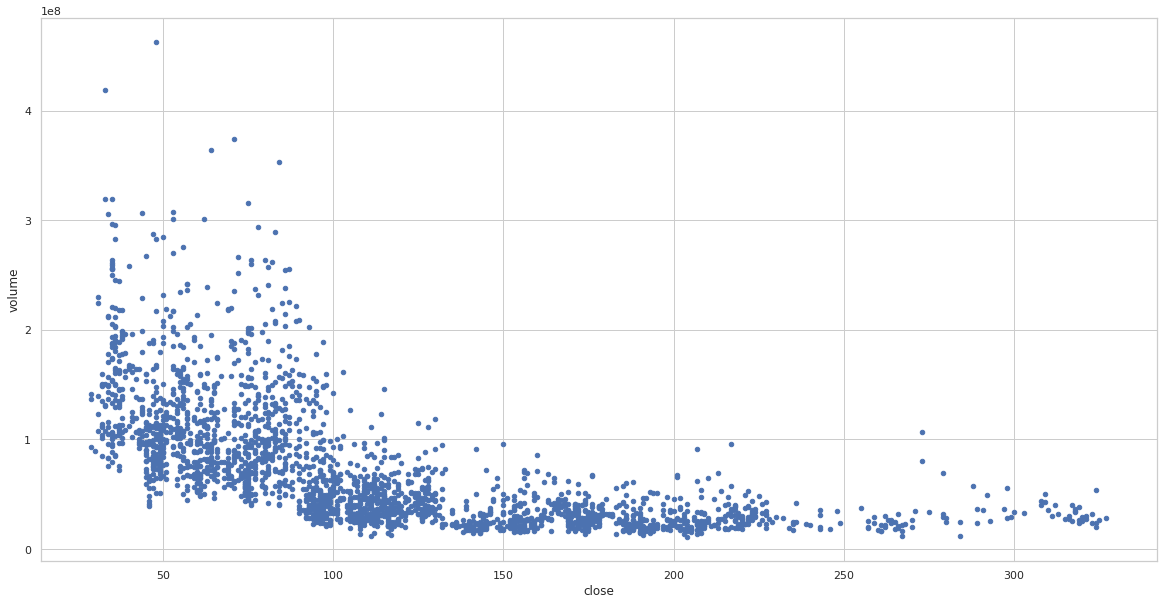

In [83]:
df[["close", "volume"]].plot(x="close", y="volume", kind="scatter", figsize=(20,10))